In [74]:
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt   
import plotly.express as px
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
import tabletext
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import csv 

## 1. Read the file points1.xlsor points1.csv. With the scatter plot identify the objects. Report the natural groups, that you see.

In [40]:
df = pd.read_csv('~/Nextcloud/Uni/Maschinelles Lernen/points1.csv')
df

,Name,x,y
0,A,2,10
1,B,2,5
2,C,8,4
3,D,5,8
4,E,7,5
5,F,6,4
6,G,1,2
7,H,4,9


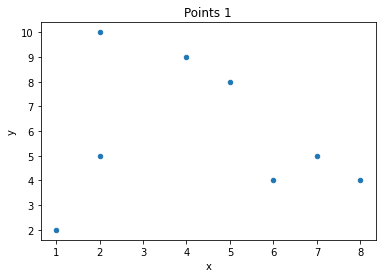

In [7]:
_ = df.plot(kind='scatter',x='x',y='y',title='Points 1')

Auf den ersten Blick würde ich nach drei Gruppen ordnen: die erste ist im linken Bereich unten mit zwei Punkten, der zweite im oberen Bereich mit drei Punkten und die letzte Grupe unten rechts mit drei Punkten.


## 2. Run K-means with the number k for the number of clusters that you have identified above. Draw a scatter-plot of the objects so that all objects in one cluster have the same color. Report this picture and comment whether these clusters coincide with the clusters identified above.

In [8]:
# Werte aus der Tabelle speichern
data_xy = df.iloc[:,[1,2]].copy()

data_xy

,x,y
0,2,10
1,2,5
2,8,4
3,5,8
4,7,5
5,6,4
6,1,2
7,4,9


In [9]:
def clustering(n_clusters):
    k = KMeans(n_clusters)
    k.fit(data_xy)
    y_kmeans = k.predict(data_xy)
    # Cluster visualisieren
    plt.scatter(data_xy.iloc[:, 0], data_xy.iloc[:, 1], c=y_kmeans, s=70) 

    plt.xlabel('x');plt.ylabel('y'); 

    # Zentren ausgeben und visualisieren
    #2 = Nachkommastelle
    centers = np.around(k.cluster_centers_,2)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=120);
    plt.show()
    print('\nZentren liegen bei:')
    print (tabletext.to_text(centers))

Points 1 Cluster with k = 3


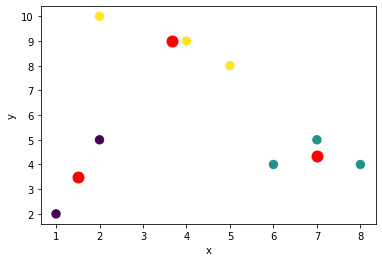


Zentren liegen bei:
┌──────┬──────┐
│  1.5 │  3.5 │
├──────┼──────┤
│  7.0 │ 4.33 │
├──────┼──────┤
│ 3.67 │  9.0 │
└──────┴──────┘


In [10]:
n_clusters=3
print ('Points 1 Cluster with k = 3')
clustering(n_clusters)

Die berechneten Cluster entsprechen den vermuteten Clustern s.o.

## 3. Report the centers of the clusters and describe qualitatively the clusters.

gDie Zentren sind jeweils die rot makierten Punkte in den Graphen. Darunter in den Tabelen sind die Punkte gelistet.

Points Cluster with k = 2:

Das Zentrum (4.8/4.0) umfasst ein sehr breit gefächertes Cluster. Die Punkte liegen breit verteilt auf der x-Achse. Möglicherweise könnte das für eine genaue Analyse der Verteilung zu ungenau sein.

Points Cluster with k = 3 (optimales k):

Es liegt wie anhand der Ellbogen bewiesen wurde eine optimale Verteilung vor. Die Zentren mit den Objekten liegen sehr gut voneinander entfernt vor.
# Korrektur
> C1(1.5/3.5): übrige Objekte,
C2(7.0/4.33): kleine Objekte,
C3(3.67/9.0): große Objekte,




Points Cluster with k = 4:

Für eine optimale Verteilung der Cluster ergab die Ellbogenmethode das k = 3 die optimale Anzahl ist. Hier sehen wir das ein Zentrum (10.0/2.0) keine Punkte mehr abdeckt und das es besser wäre aus diesem Zentrum und aus dem Zentrum (4.5/8.5) nur ein Zentrum eher mittig zu setzen.



Points Cluster with k = 5 und k = 6:

Hier sehen wir das diese Anzahl an Zentren nicht sinnvoll ist, da die Ausreißer mit Zentren bedacht werden.




## 4. Vary K, the number of clusters, and find an optimal value for K. For this, plot SSE versus K; the optimal number corresponds to a sharp drop in the curve (elbow method).Report the value of SSE for this optimal K.

Points 1 Cluster with k = 2


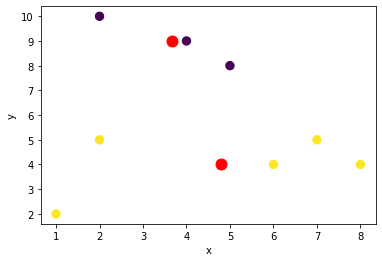


Zentren liegen bei:
┌──────┬─────┐
│ 3.67 │ 9.0 │
├──────┼─────┤
│  4.8 │ 4.0 │
└──────┴─────┘


In [73]:
n_clusters=2
print ('Points 1 Cluster with k = 2')
clustering(n_clusters)

Points 1 Cluster with k = 4


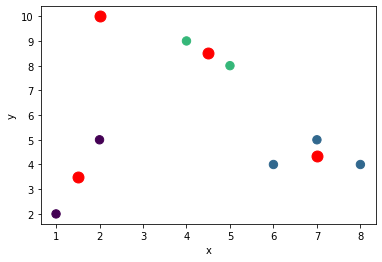


Zentren liegen bei:
┌─────┬──────┐
│ 1.5 │  3.5 │
├─────┼──────┤
│ 7.0 │ 4.33 │
├─────┼──────┤
│ 4.5 │  8.5 │
├─────┼──────┤
│ 2.0 │ 10.0 │
└─────┴──────┘


In [74]:
n_clusters=4
print ('Points 1 Cluster with k = 4')
clustering(n_clusters)

Points 1 Cluster with k = 5


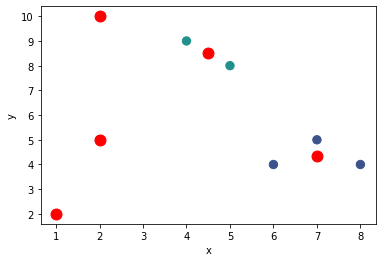


Zentren liegen bei:
┌─────┬──────┐
│ 2.0 │  5.0 │
├─────┼──────┤
│ 7.0 │ 4.33 │
├─────┼──────┤
│ 4.5 │  8.5 │
├─────┼──────┤
│ 1.0 │  2.0 │
├─────┼──────┤
│ 2.0 │ 10.0 │
└─────┴──────┘


In [75]:
n_clusters=5
print ('Points 1 Cluster with k = 5')
clustering(n_clusters)

Points 1 Cluster with k = 6


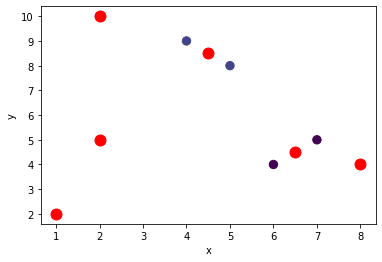


Zentren liegen bei:
┌─────┬──────┐
│ 6.5 │  4.5 │
├─────┼──────┤
│ 4.5 │  8.5 │
├─────┼──────┤
│ 1.0 │  2.0 │
├─────┼──────┤
│ 2.0 │ 10.0 │
├─────┼──────┤
│ 2.0 │  5.0 │
├─────┼──────┤
│ 8.0 │  4.0 │
└─────┴──────┘


In [76]:
n_clusters=6
print ('Points 1 Cluster with k = 6')
clustering(n_clusters)

## SSE vs K

In [77]:
sse=[]
K = range(2,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_xy)
    sse.append(kmeanModel.inertia_)
    print(kmeanModel)
    print(np.around(kmeanModel.inertia_,2))

KMeans(n_clusters=2)
51.47
KMeans(n_clusters=3)
14.33
KMeans(n_clusters=4)
8.67
KMeans(n_clusters=5)
3.67
KMeans(n_clusters=6)
2.0
KMeans(n_clusters=7)
1.0


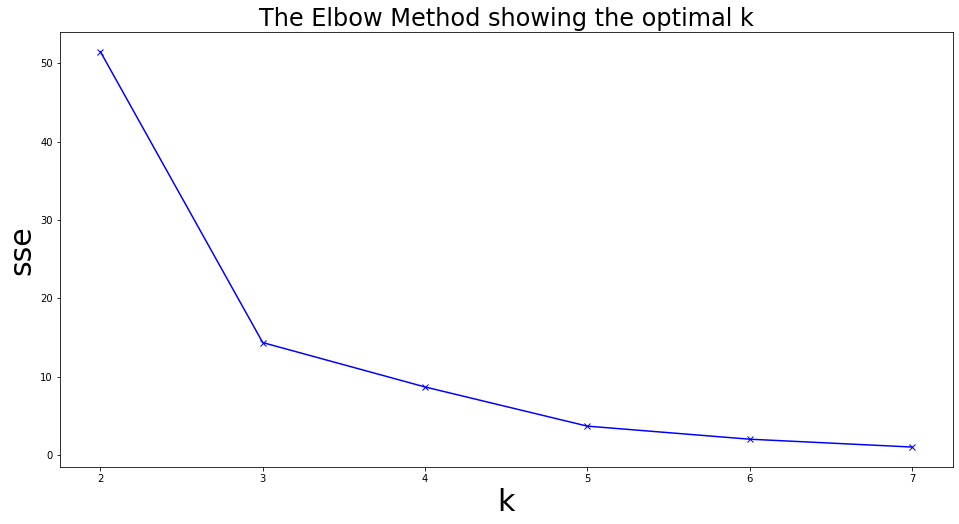

In [78]:
    plt.figure(figsize=(16,8))
    plt.plot(K, sse, 'bx-')
    plt.xlabel('k', fontsize = 30)
    plt.ylabel('sse', fontsize = 30)
    plt.title('The Elbow Method showing the optimal k', fontsize = 24)
    plt.show()

Der Wendepunkt der Kurve ("Elbow") liegt bei k = 3 und SSE = 14,33. Das bedeutet das k = 3 eine gute Wahl für die Cluster ist. Wir überprüfen das Ablesen mit dem Silhouette Score. Der Wertebereich beim Silhouette Score reicht von -1 bis 1. 

1 = Cluster gut voneinander getrennt und können klar unterschieden werden


0 = Cluster sind indifferent, dh. der Abstand zwischen den Clustern ist nicht signifikant


-1 = Cluster falsch zugeordnet

[Quelle Silhouette Score](https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c)

In [79]:
K = range(2,8)
for k in K:
    clusterer = KMeans(n_clusters=k)
    preds = clusterer.fit_predict(data_xy)
    centers = clusterer.cluster_centers_

    score = silhouette_score(data_xy, preds)
    print("k = {}, silhouette score is {})".format(k, score))


k = 2, silhouette score is 0.38834298285323554)
k = 3, silhouette score is 0.5708086620582917)
k = 4, silhouette score is 0.47159245233453273)
k = 5, silhouette score is 0.36664911357015373)
k = 6, silhouette score is 0.15852567706292603)
k = 7, silhouette score is 0.12191402471124449)


Der Silhouette Score liegt bei k = 3 bei 0.57. Wir wollen uns der 1 so weit wie möglich annähren. Bei k = 2 und K = 4 geht der Wert weiter Richtung 0, daher wäre auch ein kleineres oder größeres k ungünstig. Hiermit bestätigt sich:
> k = 3

## 5. Use the K-medoids algorithm with the same dataset and the number K identified in question 4 above. Compare the clusters you get with the clusters obtained with K-means. What are the centers of the clusters? Explain briefly the main difference between K-means and K-medoids.Report all your results.

In [80]:
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(data_xy)

Punkte der K-Medoids Zentren:

In [81]:
pd.DataFrame(kmedoids.cluster_centers_
, columns=['x', 'y'])

,x,y
0,4,9
1,2,5
2,7,5


K-Medoids Cluster mit Zentren:

Points 1 Cluster with k-medoid


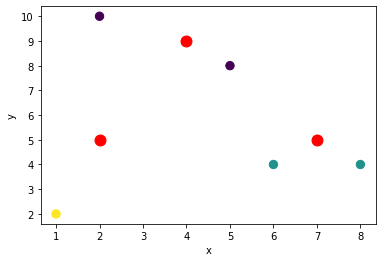


Zentren liegen bei:
┌───┬───┐
│ 4 │ 9 │
├───┼───┤
│ 2 │ 5 │
├───┼───┤
│ 7 │ 5 │
└───┴───┘



Points 1 Cluster with k-mean 


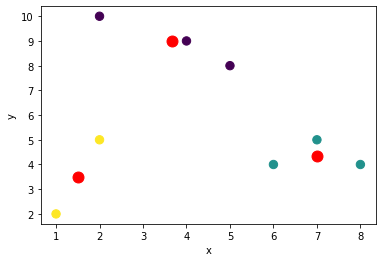


Zentren liegen bei:
┌──────┬──────┐
│ 3.67 │  9.0 │
├──────┼──────┤
│  7.0 │ 4.33 │
├──────┼──────┤
│  1.5 │  3.5 │
└──────┴──────┘


In [82]:
k = KMeans(n_clusters=3)
k.fit(data_xy)
y_kmeans = k.predict(data_xy)

print ('Points 1 Cluster with k-medoid')

# Cluster visualisieren
plt.scatter(data_xy.iloc[:, 0], data_xy.iloc[:, 1], c=y_kmeans, s=70) 

plt.xlabel('x');plt.ylabel('y'); 
    
# Zentren ausgeben und visualisieren
centers = kmedoids.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=120);
plt.show()

print('\nZentren liegen bei:')
print (tabletext.to_text(centers))

n_clusters=3
print ('\n\n\nPoints 1 Cluster with k-mean ')
clustering(n_clusters)

Bei der Betrachtung der Zentren von k-means und k-medoids fällt auf das die Zentren bei k-medoids  sehr nahe den Zentren von k-means liegen. Allerdings ist zu sehen, das Die k-medoid Zentren den Platz von ursprünglichen Punkten im jeweiligen Cluster eingenommen hat.


Bei k-mean ist das Zentrum des Clusters der Mittelwert. Der Mittelwert ist empfindlicher was Ausreißer betrifft, da er nicht mehr genau den Durschnitt der Menge repräsentiert. K-Medoids Centroids sind nicht so empfindlich wie k-mean Zentren, da es einen anderen Clustering Algorithmus verwendet:

Es wird zu jedem Punkt der Abstand zu allen anderen Punkten genommen. Dann wird der Punkt mit den kürzesten Abstand zu einem anderen Punkt als das neue Zenter genommen.

# KORREKTUR
## Exercise 7: Hierarchical Agglomerative Clustering. Try out this algorithm with points1.xls and the measures single link, complete link and average link. Notice that the dendograms are different.

Linkage Single


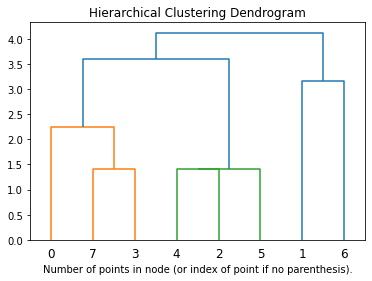

Linkage Average


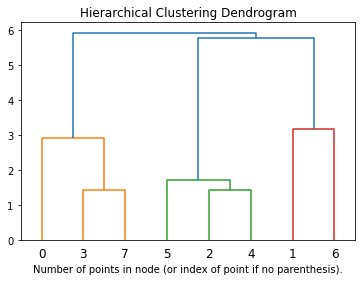

Linkage Complete


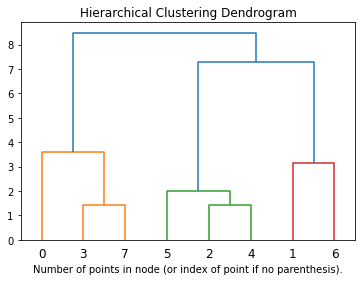

In [159]:

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(np.float64)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
   
                                      
                                      
file_CSV = open('./points1.csv')
data_CSV = pd.read_csv(file_CSV)
data_CSV = data_CSV.iloc[:,[1,2]].copy()
X = data_CSV.to_numpy()
   
        

        
        

def showDendogram(model):
    model = model.fit(X)
    plt.title('Hierarchical Clustering Dendrogram')
    # plot the top three levels of the dendrogram
    plot_dendrogram(model, truncate_mode='level', p=3)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()

    

model1 = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='single')
print('Linkage Single')
showDendogram(model1)  
model2 = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='average')
print('Linkage Average')
showDendogram(model2)  
model3 = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='complete')
print('Linkage Complete')
showDendogram(model3)  
